# Compute usage entropy, TM entropy, and outgoing entropy across age for all datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
from aging.plotting import figure, format_plots

In [2]:
format_plots()

## V11

In [3]:
boot_df = []

In [4]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_raw_usage_matrix_v00.parquet').astype(float)
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)
df = df[keep_syllables]

ent = pd.Series(entropy(df.to_numpy() + 1e-4, axis=1), index=df.index)
ent.name = 'ont_male'
ent = ent.groupby('age').mean()
boot_df.append(ent)

In [5]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_females_raw_usage_matrix_v00.parquet').astype(float)
df = df[keep_syllables]
df = df.query('age < 100')

ent = pd.Series(entropy(df.to_numpy() + 1e-4, axis=1), index=df.index)
ent.name = 'ont_female'
ent = ent.groupby('age').mean()
boot_df.append(ent)

In [6]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/longtogeny_males_raw_usage_matrix_v00.parquet').astype(float)
df = df[keep_syllables]
df = df.query('age < 90')

usage_order = df.quantile(0.9).sort_values(ascending=False).index
df = df[usage_order].astype('float32')

df['age_binned'] = (df.index.get_level_values('age') * 7) // 30
df = df.set_index('age_binned', append=True)
df = df.groupby(['mouse', 'age_binned']).sample(n=1)

ent = pd.Series(entropy(df.to_numpy() + 1e-4, axis=1), index=df.index)
ent.name = 'long_male'
ent = ent.groupby('age_binned').mean()
ent.index = (ent.index * 30) // 7
ent.index.name = 'age'
boot_df.append(ent)

[Text(0, 0.5, 'entropy')]

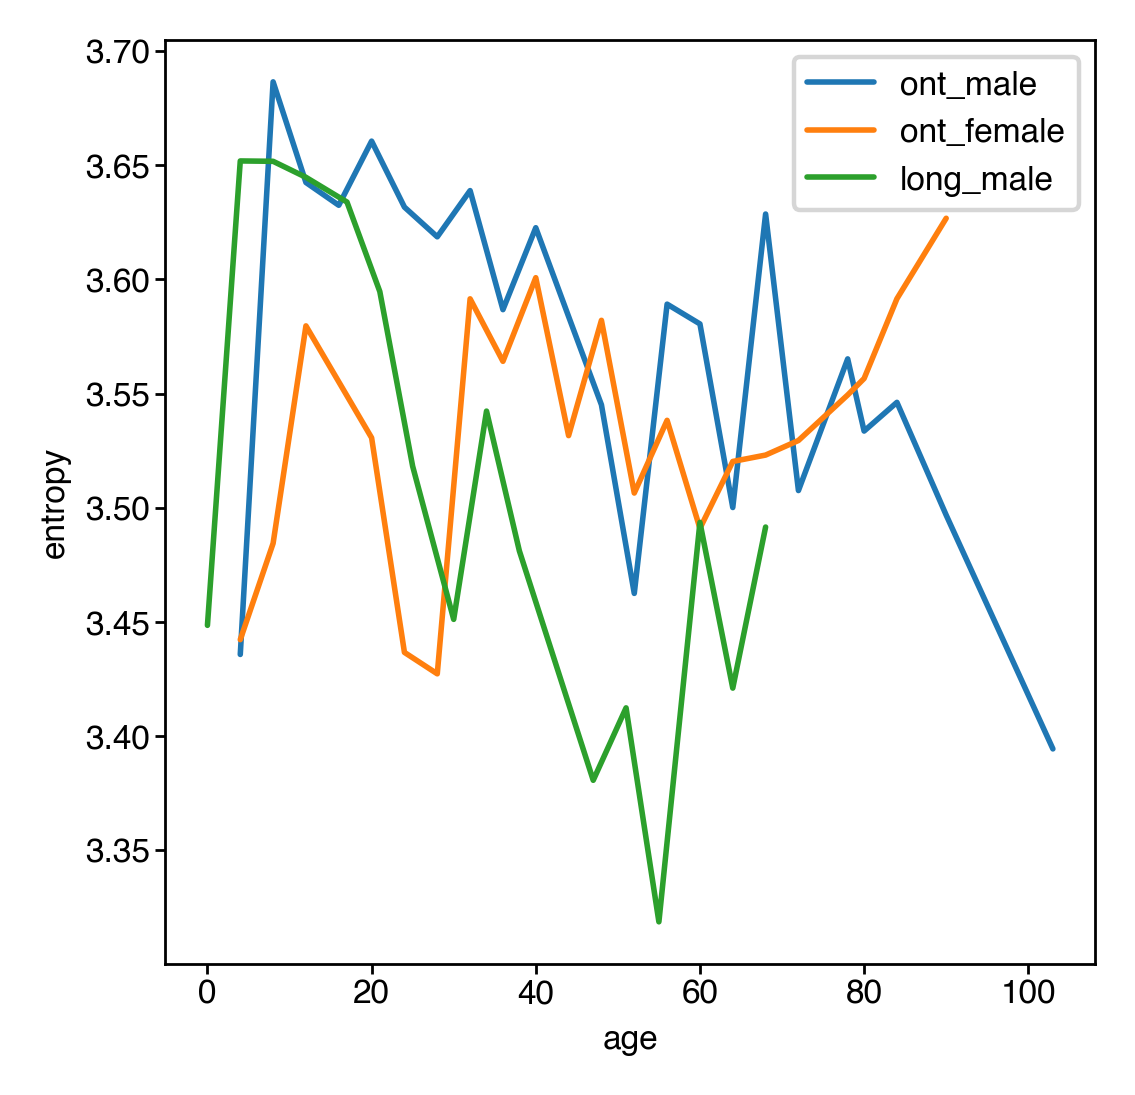

In [7]:
for x in boot_df:
    ax = sns.lineplot(data=x.reset_index(), x='age', y=x.name, label=x.name)
ax.set(ylabel='entropy')

## V12

In [8]:
boot_df = []

In [9]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_12/ontogeny_males_raw_usage_matrix_v00.parquet').astype(float)
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_12/to_keep_syllables_raw.txt', dtype=int)
df = df[keep_syllables]

ent = pd.Series(entropy(df.to_numpy() + 1e-4, axis=1), index=df.index)
ent.name = 'ont_male'
ent = ent.groupby('age').mean()
boot_df.append(ent)

In [10]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_12/ontogeny_females_raw_usage_matrix_v00.parquet').astype(float)
df = df[keep_syllables]
df = df.query('age < 100')

ent = pd.Series(entropy(df.to_numpy() + 1e-4, axis=1), index=df.index)
ent.name = 'ont_female'
ent = ent.groupby('age').mean()
boot_df.append(ent)

In [11]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_12/longtogeny_males_raw_usage_matrix_v00.parquet').astype(float)
df = df[keep_syllables]
df = df.query('age < 90')

usage_order = df.quantile(0.9).sort_values(ascending=False).index
df = df[usage_order].astype('float32')

df['age_binned'] = (df.index.get_level_values('age') * 7) // 30
df = df.set_index('age_binned', append=True)
df = df.groupby(['mouse', 'age_binned']).sample(n=1)

ent = pd.Series(entropy(df.to_numpy() + 1e-4, axis=1), index=df.index)
ent.name = 'long_male'
ent = ent.groupby('age_binned').mean()
ent.index = (ent.index * 30) // 7
ent.index.name = 'age'
boot_df.append(ent)

[Text(0, 0.5, 'entropy')]

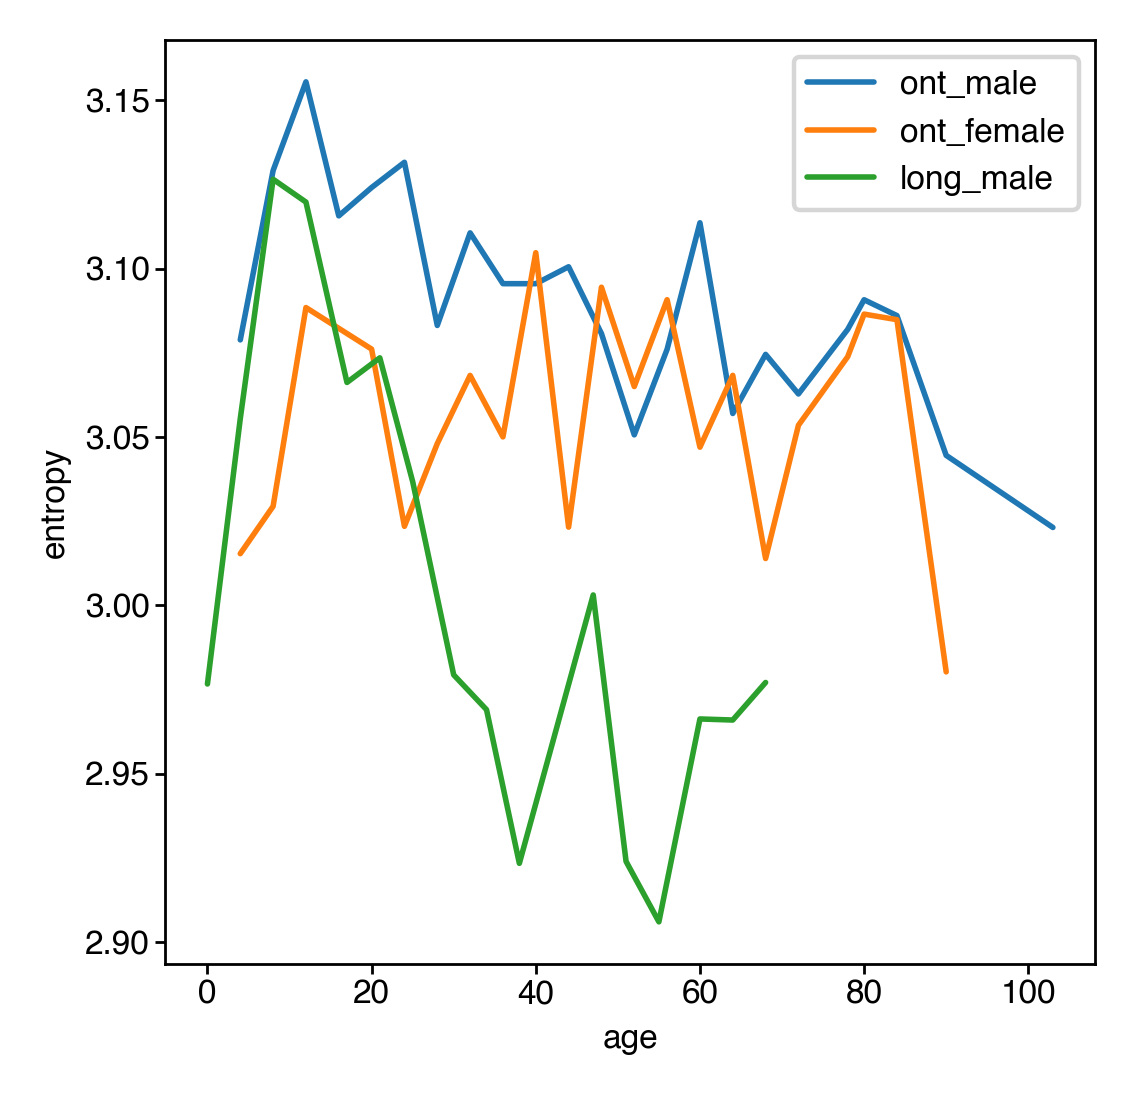

In [12]:
for x in boot_df:
    ax = sns.lineplot(data=x.reset_index(), x='age', y=x.name, label=x.name)
ax.set(ylabel='entropy')